<a href="https://colab.research.google.com/github/nsriniva/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [304]:
import numpy as np

def mvs_func(data, ddof=0):
  num = len(data) - ddof
  mean = data.mean()

  var_list = (data - mean)**2
  var = var_list.sum()/num

  std = var**0.5

  return mean,var,std 



In [305]:
data = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])
m0,v0,s0 = mvs_func(data)
print(m0, v0, s0,'\n' )

m1,v1,s1 = mvs_func(data, ddof=1)

print(m1, v1, s1 )


3052.714285714286 183761.06122448976 428.67360686714756 

3052.714285714286 214387.90476190473 463.0204150595357



## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [306]:

def covar(a,b, ddof=0):

  num = len(a) - ddof
  amean = a.mean()
  bmean = b.mean()

  covar_list = (data - amean)*(datb- bmean)

  covar = sum(covar_list)/num

  return covar

datb = np.array([127, 80, 105, 92, 120, 115, 93])

print(covar(data, datb, ddof=0),'\n')

print(covar(data, datb, ddof=1),'\n')

# np.cov(a,b), where a and b are 1D arrays, returns a 2x2 covariance matrix C

# where C[0][0] == covariance(a,a) = variance(a)
# C[0][1] == C[1][0] == covariance(a,b)
# C[1][1] == variance(b)

# We can confirm this for a, since we've already computed the variance for a 
# Variance(a,0) ==  183761.06122448976
# C0[0][0] == 183761.06122449
# Covariance(a,b,0) == 6518.020408163265 
# C0[0][1] == C0[1][0] == 6518.02040816

# Variance(a,1) ==  214387.90476190473
# C1[0][0] == 214387.9047619
# Covariance(a,b,1) == 7604.357142857142 
# C1[0][1] == C0[1][0] == 7604.35714286

print(np.cov(data, datb, ddof=0),'\n')

print(np.cov(data, datb, ddof=1))


6518.020408163265 

7604.357142857142 

[[183761.06122449   6518.02040816]
 [  6518.02040816    249.3877551 ]] 

[[214387.9047619    7604.35714286]
 [  7604.35714286    290.95238095]]


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [307]:
_,_,sd_cust = mvs_func(datb,ddof=1)
_,_,sd_sale = mvs_func(data, ddof=1)

cov_cust_sale = covar(data, datb, ddof=1)

print(sd_cust,sd_sale, cov_cust_sale, '\n')

corr_coeff_1 = cov_cust_sale/(sd_cust*sd_sale)

print(corr_coeff_1,'\n\n')
_,_,sd_cust = mvs_func(datb)
_,_,sd_sale = mvs_func(data)

cov_cust_sale = covar(data, datb)

print(sd_cust,sd_sale, cov_cust_sale, '\n')

corr_coeff_0 = cov_cust_sale/(sd_cust*sd_sale)

print(corr_coeff_0,'\n\n')

# Important to note that while standard deviations and
# covariance values are affected by the ddof value, the
# correlation coefficient is not.

# As with the covariance matrix, the correlation coefficient
# matrix has
# r[0][0] == correlation coefficient of (a,a) == 1
# r[1][1] == correlation coefficient of (b,b) == 1
# r[0][1] == r[1][0] == correlation coefficient of (a,b)
# Computed correlation coefficient == 0.9628339778148909
# r[0][1] == r[0][1] == 0.96283398

display(np.corrcoef(data, datb))





17.057326313123664 463.0204150595357 7604.357142857142 

0.9628339778148909 


15.792015549069118 428.67360686714756 6518.020408163265 

0.9628339778148909 




array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [308]:
import pandas as pd

titanic_url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
df_titanic = pd.read_csv(titanic_url)

df_titanic

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.000000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.916700,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,1306,3.0,0.0,"Zabour, Miss. Thamine",female,29.881135,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN,0
1306,1307,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.500000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN,0
1307,1308,3.0,0.0,"Zakarian, Mr. Ortin",male,27.000000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN,0
1308,1309,3.0,0.0,"Zimmerman, Mr. Leo",male,29.000000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN,0


In [309]:
display(df_titanic.isnull().sum())
print('\n')
display(df_titanic.dtypes)
print('\n')

num_cols = df_titanic.select_dtypes(include=np.number).columns.tolist()
display(num_cols)
print('\n')

# Exclude the first sequential index column and
# the 'body' column since it is mostly NaNs 
num_cols = num_cols[1:]
num_cols.remove('body')

display(num_cols)

Unnamed: 0             0
pclass                 1
survived               1
name                   1
sex                    1
age                    0
sibsp                  1
parch                  1
ticket                 1
fare                   2
cabin               1015
embarked               0
boat                 824
body                1189
home.dest            565
has_cabin_number       0
dtype: int64

Unnamed: 0            int64
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

['Unnamed: 0',
 'pclass',
 'survived',
 'age',
 'sibsp',
 'parch',
 'fare',
 'body',
 'has_cabin_number']

['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'has_cabin_number']

In [310]:
df_titanic_num = df_titanic[num_cols]

df_titanic_num

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
0,1.0,1.0,29.000000,0.0,0.0,211.3375,1
1,1.0,1.0,0.916700,1.0,2.0,151.5500,1
2,1.0,0.0,2.000000,1.0,2.0,151.5500,1
3,1.0,0.0,30.000000,1.0,2.0,151.5500,1
4,1.0,0.0,25.000000,1.0,2.0,151.5500,1
...,...,...,...,...,...,...,...
1305,3.0,0.0,29.881135,1.0,0.0,14.4542,0
1306,3.0,0.0,26.500000,0.0,0.0,7.2250,0
1307,3.0,0.0,27.000000,0.0,0.0,7.2250,0
1308,3.0,0.0,29.000000,0.0,0.0,7.8750,0


In [311]:
# Compute the variance-covariance matrix
df_titanic_num.cov()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,10.976961
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,0.174613


In [312]:
# Compute the correlation coefficient matrix
df_titanic_num.corr()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,0.507253
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

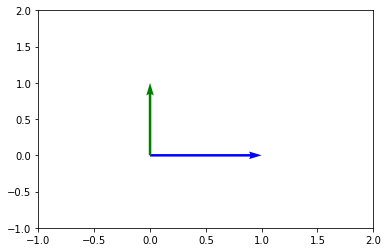

In [313]:
# A synonym for orthogonal would be perpendicular.

import matplotlib.pyplot as plt


def plot_2dvectors(vects2d, colors, axes, orig=None):
  if orig is None:
    orig = [0,0]

  origin2d = np.array(orig)

  vects2d = [[*origin2d, *vect2d] for vect2d in vects2d]
  X, Y, U, V= zip(*vects2d)
  axes.quiver(X, Y, U, V, scale_units='xy', scale=1, angles='xy', color=colors)


veca = np.array([1,0])

vecb = np.array([0,1])

fig, axes = plt.subplots()

axes.set_xlim(-1, 2)
axes.set_ylim(-1,2)

plot_2dvectors([veca,vecb], ['blue', 'green'], axes)


## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [314]:
veca = np.array([-5, 3, 7])

vecb = np.array([6, -8, 2])

veca_dot_vecb = np.dot(veca, vecb)

print(f'{veca} and {vecb} have a dot product of {veca_dot_vecb} and are therefore {["not",""][int(veca_dot_vecb == 0)]} orthogonal')


[-5  3  7] and [ 6 -8  2] have a dot product of -40 and are therefore not orthogonal


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [315]:
vecc = np.array([2, -15, 6, 20])

norm_vecc_squared = np.linalg.norm(vecc)**2

print(norm_vecc_squared)

vecc_dot_vecc = np.dot(vecc, vecc)

print(vecc_dot_vecc)

vecc_trans_vecc = np.matmul(vecc.T, vecc)

print(vecc_trans_vecc)

665.0
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

We have 
\begin{align}
\vec{d} = \begin{bmatrix} 2 \\ 3 \end{bmatrix}
\qquad
\vec{e} = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix}
\end{align}

The vector $\vec{d}$ can be written as

$\vec{d} = 2\hat{i} + 3\hat{j}$, where $\hat{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$, $\hat{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$

The vector $\vec{e}$ can be written as

$\vec{e} = 2\hat{i} + 11\hat{j} - 8\hat{k}$, where $\hat{i} = \begin{bmatrix} 1 \\ 0 \\0 \end{bmatrix}$, $\hat{j} = \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}$ and $\hat{k} = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}$


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [316]:
vecf = np.array([4,2,11,9,2])

vecf_norm = np.linalg.norm(vecf)

vecf_unit = vecf/vecf_norm

# Verify vecf_unit is a unit vector
# by computing norm
print(vecf_unit, np.linalg.norm(vecf_unit))

[0.26607604 0.13303802 0.73170912 0.59867109 0.13303802] 1.0


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

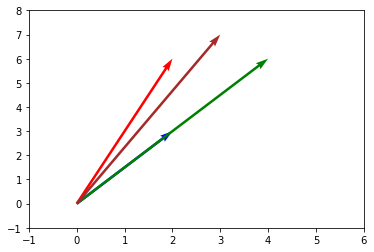

In [317]:
veca = np.array([2, 3])

veca_ld = 2*veca

vecb = np.array([2, 6])
vecb_li = np.array([3, 7])

fig,axes = plt.subplots()
axes.set_xlim(-1, 6)
axes.set_ylim(-1,8)

# The linearly dependent vectors are veca(blue) and veca_ld(green)
# The linearly independent vectors are vecb(red) and vecb_li(brown)

plot_2dvectors([veca,veca_ld, vecb, vecb_li ], ['blue', 'green', 'red', 'brown'], axes)


# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [318]:
matA = np.array([[1,2],[4,8]])

print(np.linalg.matrix_rank(matA))

1


Since the matrix rank is 1, g and h are collinear. Therefore, the span of the vectors is the line y=2x.  


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [319]:
matA = np.array([[1,2,3],[-1,0,7],[4, 8,2]])

# The rank is 3
print(np.linalg.matrix_rank(matA))



3


Since the matrix rank is 3, the vectors l,m and n are linearly independent. 

Therefore, their span is the set of all linear combinations of l,m and n i.e.$\mathbb{R}^{3}$ 

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



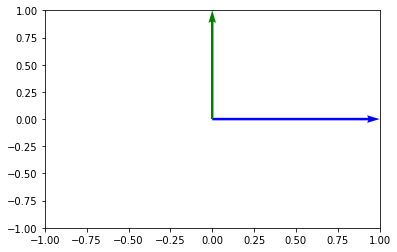

In [320]:
veci = np.array([1, 0])

vecj = np.array([0, 1])

fig,axes = plt.subplots()
axes.set_xlim(-1, 1)
axes.set_ylim(-1,1)

plot_2dvectors([veci, vecj ], ['blue', 'green'], axes)

## 6.2 What does it mean to form a basis?

A basis is a set of vectors such that every vector in the space can be expressed as a linear combination of the vectors in the basis. 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [321]:
P = np.array([[1,2,3],[-1, 0,7],[4, 8, 2]])

np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix tells us the number of rows of the matrix that are linearly independent.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

[0.5 1.5] [-1.5  0.5] 0.0


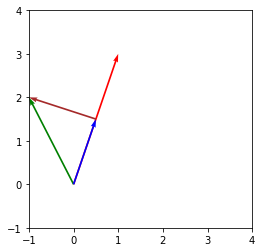

In [322]:
vecv = np.array([1,3])

vecw = np.array([-1,2])

vecw_proj_vecv = (np.dot(vecw,vecv)/np.dot(vecv, vecv))*vecv 

fig,axes = plt.subplots()

fig.set_size_inches(4,4)

axes.set_xlim(-1, 4)
axes.set_ylim(-1,4)

vecw_perp = vecw - vecw_proj_vecv

# Plotting vecv(red), vecw(green) and vecw_proj_vecv(blue)
plot_2dvectors([vecv, vecw, vecw_proj_vecv ], ['red', 'green', 'blue'], axes)

print(vecw_proj_vecv, vecw_perp, np.dot(vecw_proj_vecv, vecw_perp))

plot_2dvectors([vecw_perp], ['brown'], axes, orig=vecw_proj_vecv)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

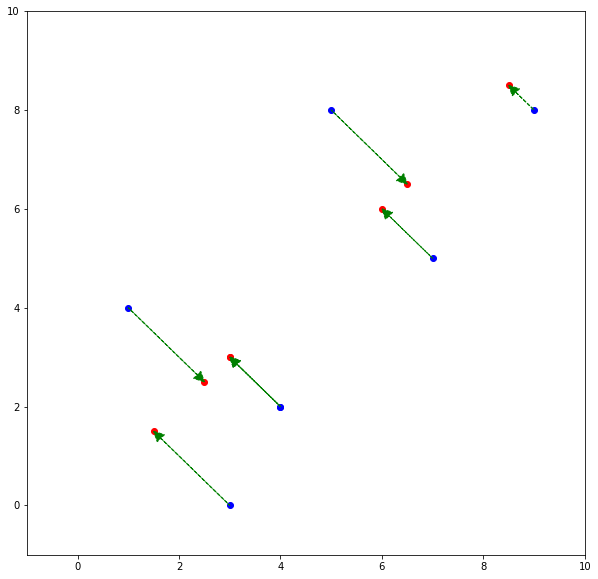

In [327]:
import pandas as pd
import matplotlib.pyplot as plt

def proj_xy(x, y, proj_vec=None):

  if proj_vec is None:
    proj_vec = [1,1]

  xy_list = list(zip(x, y))

  proj_vec = np.array(proj_vec)

  proj_func = lambda u,v:(np.dot(u,v)/np.dot(v, v))*v

  return zip(*[ proj_func(u,proj_vec) for u in xy_list])

def plot_proj(x, y, xp, yp, axes):
  # Compute the vector(O2P) going from the original vector(O) to the projected
  # vector(P) on the line y=x, where O+O2P = P => O2P = P-O
  #  
  xv = xp - x 
  yv = yp - y

  # Convert both sets of x and y coordinates to lists of (x,y) tuples
  vecv = list(zip(xv, yv))
  orig = list(zip(x,y))

  for i,v in enumerate(vecv):
    # linestyle doesn't appear to work with axes.quiver() which is what 
    # plot_2dvectors uses. 
    #plot_2dvectors([v], ['green'], axes, orig=orig[i])
    # Using plt.arrow() to get the dashed line effect.
    plt.arrow(*orig[i], *v, length_includes_head=True, head_width=0.2, head_length=0.2,color = 'g', linestyle='--')


fig,axes = plt.subplots()

fig.set_size_inches(10,10)

axes.set_xlim(-1, 10)
axes.set_ylim(-1,10)
# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

x_proj, y_proj = proj_xy(x_values, y_values)


data = {"x": x_values, "y": y_values}

data_proj = {"x": x_proj, "y":y_proj}

df = pd.DataFrame(data)

df_proj = pd.DataFrame(data_proj)

plt.scatter(df.x, df.y,color='blue')

plt.scatter(df_proj.x, df_proj.y, color='red')

plot_proj(df.x, df.y, df_proj.x, df_proj.y, axes)

plt.show()